# region_surface_areas

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.metrics.region_surface_areas))

---
 ## Documentation for ``region_surface_areas``
 ---
**<span style="color:purple">region&#95;surface&#95;areas</span>_(regions, voxel_size=1, strel=None)_**


Extracts the surface area of each region in a labeled image.


Optionally, it can also find the the interfacial area between all
adjoining regions.

#### Parameters
* regions : <b><i>ND-array</i></b>  An image of the pore space partitioned into individual pore regions.
	Note that zeros in the image will not be considered for area
	calculation.
* voxel_size : <b><i>scalar</i></b>  The resolution of the image, expressed as the length of one side of a
	voxel, so the volume of a voxel would be **voxel_size**-cubed.  The
	default is 1.
* strel : <b><i>array_like</i></b>  The structuring element used to blur the region.  If not provided,
	then a spherical element (or disk) with radius 1 is used.  See the
	docstring for ``mesh_region`` for more details, as this argument is
	passed to there.

#### Returns
* result : <b><i>list</i></b>  A list containing the surface area of each region, offset by 1, such
	that the surface area of region 1 is stored in element 0 of the list.
---

### Import packages

In [2]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

### Create image and variables:

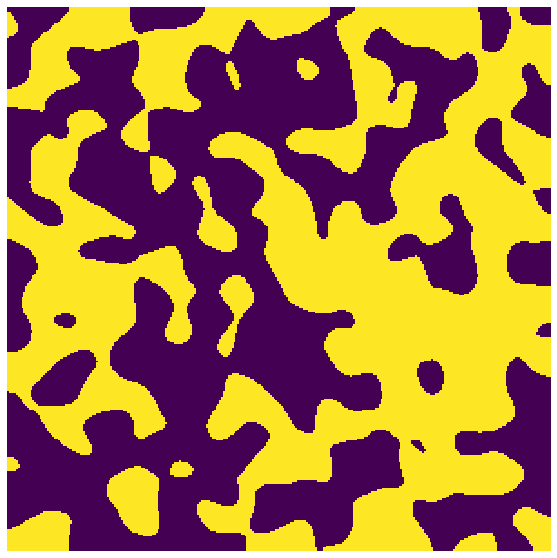

In [3]:
skel = ps.generators.blobs(shape=[300, 300])
branch_points = None
iterations = 10
im = ps.filters.prune_branches(skel, branch_points, iterations)
r = ps.filters.snow_partitioning(
    im, dt=None, r_max=4, sigma=0.4, return_all=True, mask=True, randomize=True
)
regions = r.regions

#default values:
voxel_size = 1
strel = None

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

### Apply metric function:

Output is a list of the surface ares of each region

In [4]:
x = ps.metrics.region_surface_areas(regions = regions, voxel_size=voxel_size,strel= strel)
xx = ps.metrics.region_surface_areas(regions=regions, voxel_size = 10, strel=strel)

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

#

Plot results:

Text(0.5, 1.0, 'voxel_size = 10')

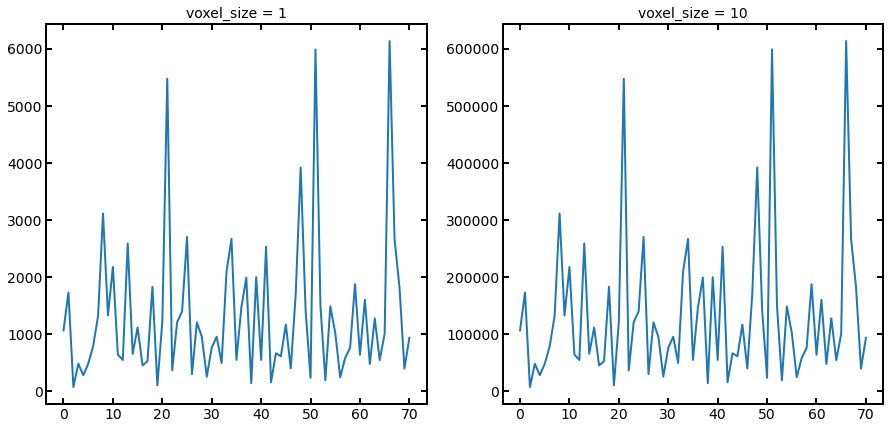

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x)
ax[1].plot(xx)
ax[0].set_title("voxel_size = 1")
ax[1].set_title("voxel_size = 10")